# Importing The Libraries

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D


In [3]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model


In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

# Read The Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
PATH = r"/content/drive/MyDrive/Softcom/Project/dataset/"
df = ["withMask", "withoutMask"]

# Image Preprocessing

In [17]:
# array for image and class
dataImg = []
dataClass = []

In [18]:
for labels in df:
    Imagepath = os.path.join(PATH, labels)
    for img in os.listdir(Imagepath):
    	JoinImageToPath = os.path.join(Imagepath, img)
    	resizeImage = load_img(JoinImageToPath, target_size=(224, 224))
    	imageToArray = img_to_array(resizeImage)
    	PreprocessImage = preprocess_input(imageToArray)
    	dataImg.append(PreprocessImage)
    	dataClass.append(labels)


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [19]:
print(dataClass)

['withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'withMask', 'wi

In [20]:
print(dataImg[1])

[[[-0.69411767 -0.7019608  -0.6627451 ]
  [-0.7019608  -0.70980394 -0.67058825]
  [-0.7254902  -0.7254902  -0.70980394]
  ...
  [-0.5686275  -0.56078434 -0.5294118 ]
  [-0.5529412  -0.54509807 -0.5294118 ]
  [-0.5372549  -0.5294118  -0.5137255 ]]

 [[-0.7019608  -0.69411767 -0.6627451 ]
  [-0.7019608  -0.69411767 -0.6627451 ]
  [-0.7176471  -0.70980394 -0.69411767]
  ...
  [-0.5764706  -0.5686275  -0.5372549 ]
  [-0.9764706  -0.96862745 -0.9529412 ]
  [ 0.99215686  1.          1.        ]]

 [[-0.7019608  -0.69411767 -0.6627451 ]
  [-0.70980394 -0.7019608  -0.67058825]
  [-0.73333335 -0.7254902  -0.70980394]
  ...
  [-0.5764706  -0.5686275  -0.5372549 ]
  [ 0.99215686  1.          1.        ]
  [ 0.96862745  0.9764706   0.99215686]]

 ...

 [[-0.9529412  -0.96862745 -0.9607843 ]
  [-0.9607843  -0.9764706  -0.96862745]
  [-0.9607843  -0.9764706  -0.96862745]
  ...
  [-0.92941177 -0.4588235  -0.372549  ]
  [-0.92941177 -0.58431375 -0.4980392 ]
  [-0.9607843  -0.73333335 -0.67058825]]

 [

In [21]:
imgData = np.array(dataImg, dtype="float32")

# One-Hot Coding with labels

In [22]:
lb = LabelBinarizer()
dataClass = lb.fit_transform(dataClass)
dataClass = to_categorical(dataClass)
dataClass = np.array(dataClass)
print(dataClass)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# Split data into 75:25 ratio

In [79]:
(trainX, testX, trainY, testY) = train_test_split(imgData, dataClass,
	test_size=0.25, random_state=1)


# Applying Data augmentation

In [24]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

# CNN model

In [33]:
learningRate = 0.01
epoch = 20
batchSize = 32

In [29]:
MobileNetModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

In [30]:
CNNmodel = MobileNetModel.output
CNNmodel = AveragePooling2D(pool_size=(7, 7))(CNNmodel)
CNNmodel = Flatten(name="flatten")(CNNmodel)
CNNmodel = Dense(128, activation="relu")(CNNmodel)
CNNmodel = Dropout(0.5)(CNNmodel)
CNNmodel = Dense(2, activation="softmax")(CNNmodel)

In [31]:
model = Model(inputs=MobileNetModel.input, outputs=CNNmodel)

# Training the Model

In [34]:
opt = Adam(lr=learningRate, decay=learningRate / epoch)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [36]:
H = model.fit(
	aug.flow(trainX, trainY, batch_size=batchSize),
	steps_per_epoch=len(trainX) // batchSize,
	validation_data=(testX, testY),
	validation_steps=len(testX) // batchSize,
	epochs=epoch)



Epoch 1/20
89/89 [==============================] - 596s 7s/step - loss: 0.1332 - accuracy: 0.9598 - val_loss: 2.5317 - val_accuracy: 0.6347
Epoch 2/20
89/89 [==============================] - 596s 7s/step - loss: 0.0886 - accuracy: 0.9701 - val_loss: 5.3942 - val_accuracy: 0.5908
Epoch 3/20
89/89 [==============================] - 602s 7s/step - loss: 0.0937 - accuracy: 0.9676 - val_loss: 3.7027 - val_accuracy: 0.7954
Epoch 4/20
89/89 [==============================] - 595s 7s/step - loss: 0.0914 - accuracy: 0.9701 - val_loss: 4.2508 - val_accuracy: 0.7954
Epoch 5/20
89/89 [==============================] - 597s 7s/step - loss: 0.0689 - accuracy: 0.9757 - val_loss: 14.4136 - val_accuracy: 0.6284
Epoch 6/20
89/89 [==============================] - 593s 7s/step - loss: 0.0738 - accuracy: 0.9768 - val_loss: 5.4904 - val_accuracy: 0.7213
Epoch 7/20
89/89 [==============================] - 602s 7s/step - loss: 0.0745 - accuracy: 0.9736 - val_loss: 9.0783 - val_accuracy: 0.7307
Epoch 8/20
8

# Predicting

In [63]:
y_pred=model.predict(testX)


In [64]:
y_pred = np.argmax(y_pred, axis=1)

In [80]:
testY=testY.argmax(axis=1)

In [81]:
print(testY)

[0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1
 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1
 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0
 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0
 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1
 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1
 1 1 0 1 0 0 0 0 1 1 1 0 

In [77]:
print(y_pred)


[0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1
 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1
 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0
 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1
 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1
 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1
 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0
 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 1 1 0 

# Performance measurement

In [85]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(testY,y_pred)
print('Accuracy %.3f'%accuracy)

from sklearn.metrics import precision_score
precision=precision_score(testY,y_pred,average="binary")
print('precision %.3f'%precision)

from sklearn.metrics import recall_score
recall=recall_score(testY,y_pred,average="binary")
print('Recall %.3f'%recall)

from sklearn.metrics import f1_score
f1=f1_score(testY,y_pred,average="binary")
print('f1_score %.3f'%f1)

Accuracy 0.890
precision 0.832
Recall 0.972
f1_score 0.897


# Result Graph

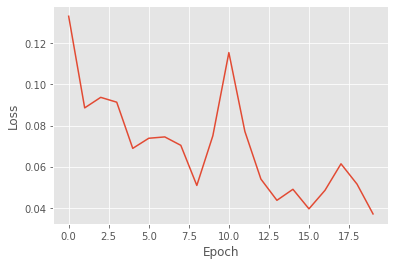

In [101]:
# Training Loss
plt.plot(np.arange(0, epoch), H.history["loss"], label="train_loss")
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.show()

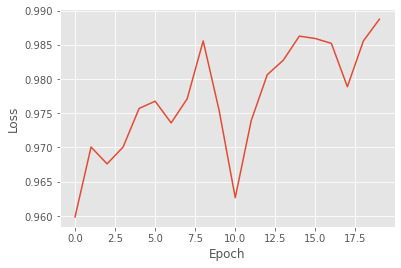

In [102]:
#Training Accuracy
plt.plot(np.arange(0, epoch), H.history["accuracy"])
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.show()